In [19]:
import pandas as pd 
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline 
import plotly.graph_objs as go
import plotly.figure_factory as ff
from plotly import tools
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
init_notebook_mode(connected=True)


import gc
from datetime import datetime 
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.metrics import roc_auc_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from catboost import CatBoostClassifier
from sklearn import svm
import lightgbm as lgb
from lightgbm import LGBMClassifier
import xgboost as xgb
import plotly.express as px
import pandas as pd

Pre-processing data resource:https://archive.ics.uci.edu/ml/datasets/Wireless+Indoor+Localization

In [86]:
training_data = pd.read_csv('desktop/trainingData.csv')
validation_df = pd.read_csv('desktop/ValidationData.csv')
training_data1 = training_data.drop(['TIMESTAMP','FLOOR','BUILDINGID','PHONEID','USERID','RELATIVEPOSITION','PHONEID'], axis= 1)
data_df = training_data1
x1=training_data1['LONGITUDE']
y1=training_data1['LATITUDE']
labels=training_data1['SPACEID']

In [65]:
total = data_df.isnull().sum().sort_values(ascending = False)
percent = (data_df.isnull().sum()/data_df.isnull().count()*100).sort_values(ascending = False)
pd.concat([total, percent], axis=1, keys=['Total', 'Percent']).transpose()

,SPACEID,WAP164,WAP166,WAP167,WAP168,WAP169,WAP170,WAP171,WAP172,WAP173,...,WAP349,WAP350,WAP351,WAP352,WAP353,WAP354,WAP355,WAP356,WAP357,WAP001
Total,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Percent,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [87]:
training_data.head()

,WAP001,WAP002,WAP003,WAP004,WAP005,WAP006,WAP007,WAP008,WAP009,WAP010,...,WAP520,LONGITUDE,LATITUDE,FLOOR,BUILDINGID,SPACEID,RELATIVEPOSITION,USERID,PHONEID,TIMESTAMP
0,100,100,100,100,100,100,100,100,100,100,...,100,-7541.2643,4.864921e+06,2,1,106,2,2,23,1371713733
1,100,100,100,100,100,100,100,100,100,100,...,100,-7536.6212,4.864934e+06,2,1,106,2,2,23,1371713691
2,100,100,100,100,100,100,100,-97,100,100,...,100,-7519.1524,4.864950e+06,2,1,103,2,2,23,1371714095
3,100,100,100,100,100,100,100,100,100,100,...,100,-7524.5704,4.864934e+06,2,1,102,2,2,23,1371713807
4,100,100,100,100,100,100,100,100,100,100,...,100,-7632.1436,4.864982e+06,0,0,122,2,11,13,1369909710


Check missing data

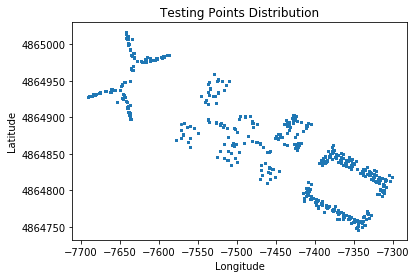

In [81]:
# Plot
plt.scatter(x=x1, y=y1, s=area)
plt.title('Testing Points Distribution')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.show()


In [84]:
training_data1.head()

,WAP001,WAP002,WAP003,WAP004,WAP005,WAP006,WAP007,WAP008,WAP009,WAP010,...,WAP513,WAP514,WAP515,WAP516,WAP517,WAP518,WAP519,WAP520,LONGITUDE,LATITUDE
0,100,100,100,100,100,100,100,100,100,100,...,100,100,100,100,100,100,100,100,-7541.2643,4.864921e+06
1,100,100,100,100,100,100,100,100,100,100,...,100,100,100,100,100,100,100,100,-7536.6212,4.864934e+06
2,100,100,100,100,100,100,100,-97,100,100,...,100,100,100,100,100,100,100,100,-7519.1524,4.864950e+06
3,100,100,100,100,100,100,100,100,100,100,...,100,100,100,100,100,100,100,100,-7524.5704,4.864934e+06
4,100,100,100,100,100,100,100,100,100,100,...,100,100,100,100,100,100,100,100,-7632.1436,4.864982e+06


In [5]:
from sklearn.ensemble import GradientBoostingClassifier, GradientBoostingRegressor
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.preprocessing import MinMaxScaler
from abc import ABCMeta, abstractmethod
from sklearn.externals import joblib
from sklearn.svm import SVC, SVR
import tensorflow as tf
import pandas as pd
import numpy as np
import pickle

train_file_name = 'desktop/TrainingData.csv'
valid_file_name = 'desktop/ValidationData.csv'


In [6]:

# Normalize scaler
longitude_scaler = MinMaxScaler()
latitude_scaler = MinMaxScaler()
print(train_file_name)
print(valid_file_name)

desktop/TrainingData.csv
desktop/ValidationData.csv


In [7]:
train_csv_path = 'desktop/TrainingData.csv'
valid_csv_path = 'desktop/ValidationData.csv'

def load(train_file_name, valid_file_name):
    # Read the file

    train_data_frame = pd.read_csv('desktop/TrainingData.csv')
    test_data_frame = pd.read_csv('desktop/ValidationData.csv')
    train_csv_path = 'desktop/TrainingData.csv'
    valid_csv_path = 'desktop/ValidationData.csv'

    # Random pick 1/10 data to be the final validation data
    rest_data_frame = train_data_frame
    valid_data_trame = pd.DataFrame(columns=train_data_frame.columns)
    valid_num = int(len(train_data_frame)/10)
    sample_row = rest_data_frame.sample(valid_num)
    rest_data_frame = rest_data_frame.drop(sample_row.index)
    valid_data_trame = valid_data_trame.append(sample_row)
    train_data_frame = rest_data_frame

    # Split data frame and return
    training_x = train_data_frame.get_values().T[:520].T
    training_y = train_data_frame.get_values().T[[520, 521, 522, 523], :].T
    validation_x = valid_data_trame.get_values().T[:520].T
    validation_y = valid_data_trame.get_values().T[[520, 521, 522, 523], :].T
    testing_x = test_data_frame.get_values().T[:520].T
    testing_y = test_data_frame.get_values().T[[520, 521, 522, 523], :].T
    return training_x, training_y, validation_x, validation_y, testing_x, testing_y

def normalizeX(arr):
    res = np.copy(arr).astype(np.float)
    for i in range(np.shape(res)[0]):
        for j in range(np.shape(res)[1]):
            if res[i][j] == 100:
                res[i][j] = 0
            else:
                res[i][j] = -0.01 * res[i][j]
    return res

def normalizeY(longitude_arr, latitude_arr):
    global longitude_scaler
    global latitude_scaler
    longitude_arr = np.reshape(longitude_arr, [-1, 1])
    latitude_arr = np.reshape(latitude_arr, [-1, 1])
    longitude_scaler.fit(longitude_arr)
    latitude_scaler.fit(latitude_arr)
    return np.reshape(longitude_scaler.transform(longitude_arr), [-1]), \
            np.reshape(latitude_scaler.transform(latitude_arr), [-1])

def reverse_normalizeY(longitude_arr, latitude_arr):
    global longitude_scaler
    global latitude_scaler
    longitude_arr = np.reshape(longitude_arr, [-1, 1])
    latitude_arr = np.reshape(latitude_arr, [-1, 1])
    return np.reshape(longitude_scaler.inverse_transform(longitude_arr), [-1]), \
            np.reshape(latitude_scaler.inverse_transform(latitude_arr), [-1])

def getMiniBatch(arr, batch_size=3):
    index = 0
    while True: 
        # print index + batch_size
        if index + batch_size >= len(arr):
            res = arr[index:]
            res = np.concatenate((res, arr[:index + batch_size - len(arr)]))
        else:
            res = arr[index:index + batch_size]
        index = (index + batch_size) % len(arr)
        yield res

class AbstractModel(object):
    __metaclass__ = ABCMeta

    # Model save path
    parameter_save_path = 'param.pkl'
    longitude_regression_model_save_path = None
    latitude_regression_model_save_path = None
    floor_classifier_save_path = None
    building_classifier_save_path = None

    # ML model object
    longitude_regression_model = None
    latitude_regression_model = None
    floor_classifier = None
    building_classifier = None

    # Normalize variable
    longitude_mean = None
    longitude_std = None
    latitude_mean = None
    latitude_std = None
    longitude_shift_distance = None
    latitude_shift_distance = None

    # Training data
    normalize_x = None
    longitude_normalize_y = None
    latitude_normalize_y = None
    floor_y = None
    buildingID_y = None

    def __init__(self):
        pass

    def _preprocess(self, x, y):
        self.normalize_x = normalizeX(x)
        self.longitude_normalize_y, self.latitude_normalize_y = normalizeY(y[:, 0], y[:, 1])
        self.floorID_y = y[:, 2]
        self.buildingID_y = y[:, 3]

    def save(self):
        print ("<< Saving >>")
        joblib.dump(self.longitude_regression_model, self.longitude_regression_model_save_path)
        joblib.dump(self.latitude_regression_model, self.latitude_regression_model_save_path)
        joblib.dump(self.floor_classifier, self.floor_classifier_save_path)
        joblib.dump(self.building_classifier, self.building_classifier_save_path)

    def load(self):
        self.longitude_regression_model = joblib.load(self.longitude_regression_model_save_path)
        self.latitude_regression_model = joblib.load(self.latitude_regression_model_save_path)
        self.floor_classifier = joblib.load(self.floor_classifier_save_path)
        self.building_classifier = joblib.load(self.building_classifier_save_path)

    def fit(self, x, y):
        # Data pre-processing
        self._preprocess(x, y)

        # Train the model
        print ("<< training >>")
        self.longitude_regression_model.fit(self.normalize_x, self.longitude_normalize_y)
        self.latitude_regression_model.fit(self.normalize_x, self.latitude_normalize_y)
        self.floor_classifier.fit(self.normalize_x, self.floorID_y)
        self.building_classifier.fit(self.normalize_x, self.buildingID_y)

        # Release the memory
        del self.normalize_x
        del self.longitude_normalize_y
        del self.latitude_normalize_y
        del self.floorID_y
        del self.buildingID_y

        # Save the result
        self.save()

    def predict(self, x):
        # Load model
        self.load()

        # Testing
        x = normalizeX(x)
        predict_longitude = self.longitude_regression_model.predict(x)
        predict_latitude = self.latitude_regression_model.predict(x)
        predict_floor = self.floor_classifier.predict(x)
        predict_building = self.building_classifier.predict(x)

        # Reverse normalization
        predict_longitude, predict_latitude = reverse_normalizeY(predict_longitude, predict_latitude)

        # Return the result
        res = np.concatenate((np.expand_dims(predict_longitude, axis=-1), 
            np.expand_dims(predict_latitude, axis=-1)), axis=-1)
        res = np.concatenate((res, np.expand_dims(predict_floor, axis=-1)), axis=-1)
        res = np.concatenate((res, np.expand_dims(predict_building, axis=-1)), axis=-1)
        return res

    def error(self, x, y, building_panality=50, floor_panality=4):
        _y = self.predict(x)
        building_error = len(y) - np.sum(np.equal(np.round(_y[:, 3]), y[:, 3]))
        floor_error = len(y) - np.sum(np.equal(np.round(_y[:, 2]), y[:, 2]))
        longitude_error = np.sum(np.sqrt(np.square(_y[:, 0] - y[:, 0])))
        latitude_error = np.sum(np.sqrt(np.square(_y[:, 1] - y[:, 1])))
        coordinates_error = longitude_error + latitude_error
        return building_panality * building_error + floor_panality * floor_error + coordinates_error

class SVM(AbstractModel):
    # Model save path
    longitude_regression_model_save_path = './svm_long.pkl'
    latitude_regression_model_save_path = './svm_lat.pkl'
    floor_classifier_save_path = './svm_floor.pkl'
    building_classifier_save_path = './svm_building.pkl'

    def __init__(self):
        self.longitude_regression_model = SVR(verbose=True)
        self.latitude_regression_model = SVR(verbose=True)
        self.floor_classifier = SVC(verbose=True)
        self.building_classifier = SVC(verbose=True)

class RandomForest(AbstractModel):
    # Model save path
    longitude_regression_model_save_path = './rf_long.pkl'
    latitude_regression_model_save_path = './rf_lat.pkl'
    floor_classifier_save_path = './rf_floor.pkl'
    building_classifier_save_path = './rf_building.pkl'

    def __init__(self):
        self.longitude_regression_model = RandomForestRegressor()
        self.latitude_regression_model = RandomForestRegressor()
        self.floor_classifier = RandomForestClassifier()
        self.building_classifier = RandomForestClassifier()

class GradientBoostingDecisionTree(AbstractModel):
    # Model save path
    longitude_regression_model_save_path = './gb_long.pkl'
    latitude_regression_model_save_path = './gb_lat.pkl'
    floor_classifier_save_path = './gb_floor.pkl'
    building_classifier_save_path = './gb_building.pkl'

    def __init__(self):
        self.longitude_regression_model = GradientBoostingRegressor()
        self.latitude_regression_model = GradientBoostingRegressor()
        self.floor_classifier = GradientBoostingClassifier()
        self.building_classifier = GradientBoostingClassifier()

    def fit(self, x, y, epoch=2, batch_size=256):
        # Data pre-processing
        self._preprocess(x, y)

        location_pair = np.concatenate((
            np.expand_dims(self.longitude_normalize_y, -1), np.expand_dims(self.latitude_normalize_y, -1)
        ), axis=-1)

        # Train the model
        print ("<< training >>")
        self.sess.run(tf.global_variables_initializer())

        for k in range(10):
            print ("-------- epoch ", k, ' ---------')
            print ("\n< position >\n")
            for i in range(epoch):
                mini_x = getMiniBatch(self.normalize_x , batch_size)
                mini_y = getMiniBatch(location_pair, batch_size)
                feed_dict = {
                    self.x: mini_x.next(),
                    self.locating_y: mini_y.next()}
                _cost, _, _output = self.sess.run([self.locating_cost, self.locating_optimize, self.locating_predict_y], feed_dict=feed_dict)
                if i % 100 == 0:
                    print ("epoch: ", i, '\tcost: ', _cost)

            
            print ("\n< building >\n")
            for i in range(epoch):
                mini_x = getMiniBatch(self.normalize_x, batch_size)
                mini_y = getMiniBatch(np.expand_dims(self.buildingID_y, -1), batch_size)
                feed_dict = {
                    self.x: mini_x.next(),
                    self.building_y: mini_y.next()}
                _cost, _, _output = self.sess.run([self.building_cost, self.building_optimize, self.building_predict_y], feed_dict=feed_dict)
                if _cost < 0.00001:
                    break
                if i % 100 == 0:
                    print ("epoch: ", i, '\tcost: ', _cost)

            print ("\n< floor >\n")
            for i in range(epoch):
                mini_x = getMiniBatch(self.normalize_x, batch_size)
                mini_y = getMiniBatch(np.expand_dims(self.floorID_y, -1), batch_size)
                feed_dict = {
                    self.x: mini_x.next(),
                    self.floor_y: mini_y.next()}
                _cost, _, _output = self.sess.run([self.floor_cost, self.floor_optimize, self.floor_predict_y], feed_dict=feed_dict)
                if _cost < 0.00001:
                    break
                if i % 100 == 0:
                    print ("epoch: ", i, '\tcost: ', _cost)            
        self.save()

    def save(self, save_path='./complex_dnn.ckpt'):
        super(ComplexDNN, self).save()
        saver = tf.train.Saver()
        saver.save(self.sess, save_path)

    def predict(self, x, model_path='./complex_dnn.ckpt'):
        # Load model and parameter
        super(ComplexDNN, self).load()
        saver = tf.train.Saver()
        saver.restore(self.sess, model_path)

        # Testing
        x = normalizeX(x)
        predict_result = self.sess.run(self.locating_predict_y, feed_dict={self.x: x})
        predict_longitude = predict_result[:, 0]
        predict_latitude = predict_result[:, 1]
        predict_building = self.sess.run(self.building_predict_y, feed_dict={self.x: x})
        predict_floor = self.sess.run(self.floor_predict_y, feed_dict={self.x: x})

        # Reverse normalization
        predict_longitude, predict_latitude = reverse_normalizeY(predict_longitude, predict_latitude)

        # Return the result
        res = np.concatenate((np.expand_dims(predict_longitude, axis=-1), 
            np.expand_dims(predict_latitude, axis=-1)), axis=-1)
        res = np.concatenate((res, predict_floor), axis=-1)
        res = np.concatenate((res, predict_building), axis=-1)
        return res

    def error(self, x, y, building_panality=50, floor_panality=4):
        _y = self.predict(x)
        building_error = len(y) - np.sum(np.equal(np.round(_y[:, 3]), y[:, 3]))
        floor_error = len(y) - np.sum(np.equal(np.round(_y[:, 2]), y[:, 2]))
        longitude_error = np.sum(np.sqrt(np.square(_y[:, 0] - y[:, 0])))
        latitude_error = np.sum(np.sqrt(np.square(_y[:, 1] - y[:, 1])))
        coordinates_error = longitude_error + latitude_error
        return building_panality * building_error + floor_panality * floor_error + coordinates_error

if __name__ == '__main__':
    # Load data
    train_x, train_y, valid_x, valid_y, test_x, test_y = load(train_csv_path, valid_csv_path)
    
    # Training
    svm_model = SVM()
    svm_model.fit(train_x, train_y)
    rf_model = RandomForest()
    rf_model.fit(train_x, train_y)
    gbdt_model = GradientBoostingDecisionTree()
    gbdt_model.fit(train_x, train_y)


    # Print testing result
    print ('SVM eror: ', svm_model.error(test_x, test_y))
    print ('Random forest error: ', rf_model.error(test_x, test_y))
    print ('Gradient boosting decision tree error: ', gbdt_model.error(test_x, test_y))

<< training >>
[LibSVM]

/Users/xiefei/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/Users/xiefei/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


[LibSVM]

/Users/xiefei/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


[LibSVM]

/Users/xiefei/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


[LibSVM]<< Saving >>
<< training >>


/Users/xiefei/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/Users/xiefei/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/Users/xiefei/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/Users/xiefei/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


<< Saving >>
<< training >>


AttributeError: 'GradientBoostingDecisionTree' object has no attribute 'sess'